<a href="https://colab.research.google.com/github/YueWangpl/DATA2040/blob/main/Cassava_Leaf_Disease_Classification_Part_1_Yue%26Tianqi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount to Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [ ]:
# pwd()
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle

In [ ]:
!kaggle competitions download -c cassava-leaf-disease-classification

In [ ]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Cassava roots are a good source of carbohydrates, vitamin C, thiamine, riboflavin, and niacin. Cassava leaves, if prepared properly, can contain up to 25 percent protein. As a resilient crop, cassava is resistant to heat and does not require much fertilizer. However, it is vulnerable to bacterial and viral diseases. One way to detect the diseases is to examine the look of cassava leaves. Therefore, it is important to identify different diseases affecting cassava leaves based on the images, which, with the utilization of deep learning, is exactly what this project tries to accomplish. We hope that our modest contribution will be useful for the development of cassava disease treatments.

## Exploratory Data Analysis

In [78]:
# load data
import pandas as pd
df = pd.read_csv("train.csv")
df.head()

,image_id,label
0,1000015157.jpg,0
1,1000201771.jpg,3
2,100042118.jpg,1
3,1000723321.jpg,1
4,1000812911.jpg,3


In [79]:
len(df)

21397

There are 21397 images in our training dataset, and each of them are labeled with a number that corresponds to a disease that cassava may have. 

To create a baseline model, the mode of the labels will be used. To find the mode, the function `.mode()` from pandas package can be used:

In [80]:
df.label.mode()

0    3
dtype: int64

So 3 will be the most common label used in our dataset. Hence, a model trained with this dataset will be biased towards 3 in the end.  
We can further examine how much more is 3 occuring as a label by a histogram and a pie chart:

Text(0.5, -0.1, 'This histogram shows the respective counts of each label in this dataset. The x-axis represents different labels and the y-axis represents the counts.')

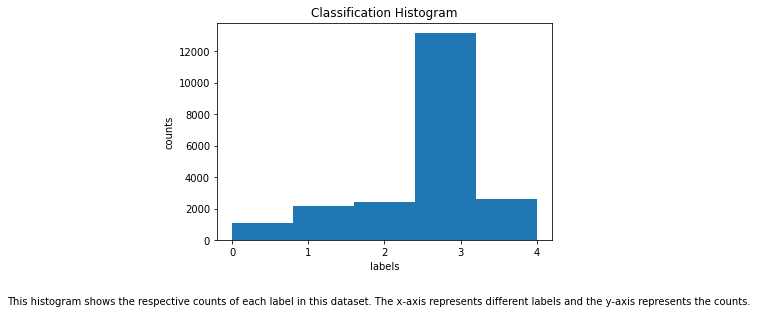

In [102]:
plt.hist(df['label'], bins=5, )
plt.title('Classification Histogram')
plt.xticks(range(5))
plt.xlabel('labels')
plt.ylabel('counts')
txt="This histogram shows the respective counts of each label in this dataset. The x-axis represents different labels and the y-axis represents the counts."
plt.figtext(0.5, -0.1, txt, wrap=True, horizontalalignment='center', fontsize=10)

In [82]:
label_count = df.groupby('label').count().reset_index()

In [83]:
ser = pd.read_json("label_num_to_disease_map.json", typ='series')
names = ser.to_frame('disease')
names

,disease
0,Cassava Bacterial Blight (CBB)
1,Cassava Brown Streak Disease (CBSD)
2,Cassava Green Mottle (CGM)
3,Cassava Mosaic Disease (CMD)
4,Healthy


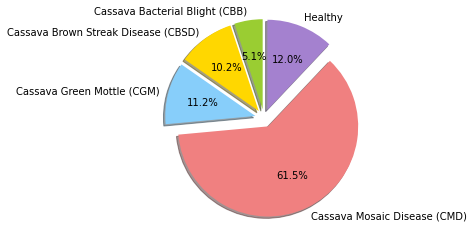

In [89]:
import matplotlib as mpl
import matplotlib.pyplot as plt


# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = tuple(names['disease'])
sizes = list(label_count['image_id'])
explode = (0.1, 0.1, 0.1, 0.1, 0.1) 
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','#A481CF']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

From the pie chart, it's clear that the disease with label 3, Cassava Mosaic Disease, constitutes 61.5% of all the classification of images. Hence, with a baseline model predicting 3 with whatever inputs, the accuracy will get to 61.5%. And our final deep learning model should outperform that, at least.

In [103]:
from sklearn.dummy import DummyClassifier

ML_algo = DummyClassifier(strategy = "most_frequent")
param_grid = {
             }
X = df['image_id']
y = df['label']

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, y)
dummy_clf.score(X, y)

0.6149460204701593

## Next Steps:




*   Image augmentation using ImageDataGenerator.  
With some tweaks on the images using image augmentation such as rotation, translation, denoising, etc, we hope to achieve a smoother learning process.
*   Model training from scratch.  
We will build our own model scratch with convolutional layers, maxpooling, and methods such as hyperparameter tuning.
*  Adopt trained models such as VGG and ResNet and perform transfer learning.  
There is a copious amount of well trained models readily availble for use. We will adopt some of them and perform transfer learning and see how well the adaptation performs.

> VGG16 and ResNet50 needs an input layer of shape (224,224,3), so image resizing is needed with that model.
The architecture of them are described in the followin images:

> VGG:  
![ResNet-50.png](https://neurohive.io/wp-content/uploads/2018/11/vgg16-neural-network.jpg)  
cr: https://neurohive.io/en/popular-networks/vgg16/

> ResNet:
![ResNet-50.png](https://www.researchgate.net/publication/338603223/figure/fig1/AS:847598516711425@1579094642237/ResNet-50-architecture-26-shown-with-the-residual-units-the-size-of-the-filters-and.png)
cr: https://www.researchgate.net/publication/338603223_Automatic_Hierarchical_Classification_of_Kelps_Using_Deep_Residual_Features 

## Links

[Kaggle Notebook](https://www.kaggle.com/yuewangpl/team1-part1)

[Github Repo](https://github.com/YueWangpl/DATA2040)

## References 

[Cassava usage](https://www.medicalnewstoday.com/articles/323756#what-is-cassava-used-for)  
[Sample Submission from Dan](https://www.kaggle.com/danpotter/blind-monkey-submission-example-data2040-sp21)  
[Sample model from Kaggle](https://www.kaggle.com/jessemostipak/getting-started-tpus-cassava-leaf-disease)  
[To load Kaggle dataset to colab](https://medium.com/analytics-vidhya/how-to-fetch-kaggle-datasets-into-google-colab-ea682569851a)
